# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: Mexico (^MXX)

In [1]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [2]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘warp’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘snakecase’, ‘PerformanceAnalytics’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘janitor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required 

**Reading the datas (Source: Yahoo Finance)**

In [3]:
getSymbols("^MXX", from = '2000-01-01', to = '2021-10-31') 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“^MXX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^MXX"

**Checking data frequency**

In [4]:
periodicity(MXX)        

Daily periodicity from 2000-01-03 to 2021-10-29 

**Identifying missing values (%)**

In [5]:
round(prop.table(table(is.na(MXX)))*100, digits = 2)       


FALSE  TRUE 
98.68  1.32 

**Removing missing values**

In [6]:
MXX <- na.omit(MXX)    
round(prop.table(table(is.na(MXX)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [7]:
MXX.df <- MXX[,'MXX.Close']                              
head(MXX.df)

           MXX.Close
2000-01-03   7077.71
2000-01-04   6675.27
2000-01-05   6764.31
2000-01-06   6751.65
2000-01-07   7047.09
2000-01-10   7333.70

**Calculating log-returns**

In [8]:
logreturn <- diff(log(MXX.df$MXX.Close))*100                     
head(logreturn)

            MXX.Close
2000-01-03         NA
2000-01-04 -5.8540748
2000-01-05  1.3250614
2000-01-06 -0.1873365
2000-01-07  4.2827839
2000-01-10  3.9865447

**Aggregating the data**

In [9]:
MXX.df$MXX.Return <- logreturn                  
MXX.df <- na.omit(MXX.df)
head(MXX.df)

           MXX.Close MXX.Return
2000-01-04   6675.27 -5.8540748
2000-01-05   6764.31  1.3250614
2000-01-06   6751.65 -0.1873365
2000-01-07   7047.09  4.2827839
2000-01-10   7333.70  3.9865447
2000-01-11   7143.13 -2.6329151

**Identifying missing values (%)**

In [10]:
round(prop.table(table(is.na(MXX.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [11]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



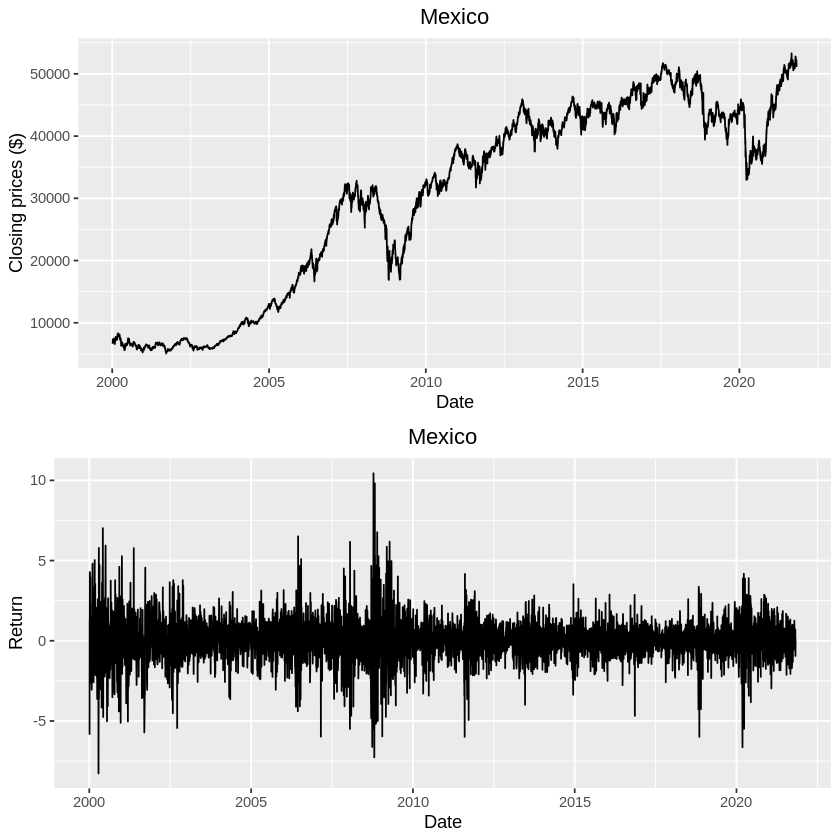

In [12]:
# Price chart
graph1 <- ggplot(MXX.df,
                aes(x = index(MXX.df), y = MXX.df[,'MXX.Close'])) +
                geom_line(color = "black") +
                ggtitle("Mexico") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(MXX.df,
                aes(x = index(MXX.df), y = MXX.df[,'MXX.Return'])) +
                geom_line(color = "black") +
                ggtitle("Mexico") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [13]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




**Descriptive statistic**

In [14]:
# mean
round(mean(MXX.df$MXX.Return), 3)                         

[1] 0.036

In [15]:
# sd
round(sd(MXX.df$MXX.Return), 3)                           

[1] 1.27

In [16]:
# skewness
round(skewness(MXX.df$MXX.Return), 3)                     

MXX.Return 
    -0.052

In [17]:
# kurtosis
round(kurtosis(MXX.df$MXX.Return), 3)                     

MXX.Return 
     8.227

In [18]:
# min
round(min(MXX.df$MXX.Return), 3)                          

[1] -8.267

In [19]:
# p5
round(quantile(MXX.df$MXX.Return, probs = 0.05), 3)       

5% 
-1.98

In [20]:
# p25
round(quantile(MXX.df$MXX.Return, probs = 0.25), 3)       

25% 
-0.578

In [21]:
# median
round(median(MXX.df$MXX.Return), 3)                       

[1] 0.058

In [22]:
# p75
round(quantile(MXX.df$MXX.Return, probs = 0.75), 3)       

75% 
0.683

In [23]:
# p95
round(quantile(MXX.df$MXX.Return, probs = 0.95), 3)       

95% 
1.925

In [24]:
# max
round(max(MXX.df$MXX.Return), 3)                          

[1] 10.441

In [25]:
# n observations
length(MXX.df$MXX.Return)                                 

[1] 5476

## 4. Series normality analysis

In [26]:
# Package
library(tseries)

In [27]:
jarque.bera.test(MXX.df$MXX.Return)


	Jarque Bera Test

data:  MXX.df$MXX.Return
X-squared = 6236.2, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [28]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

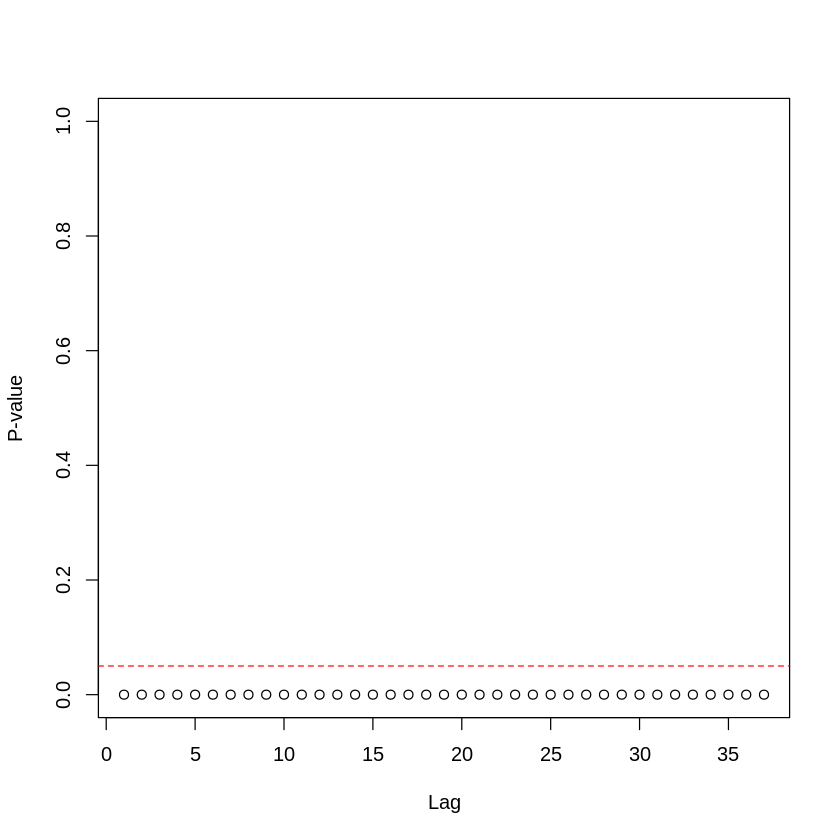

In [29]:
McLeod.Li.test(y = MXX.df$MXX.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [30]:
ArchTest(MXX.df$MXX.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  MXX.df$MXX.Return
Chi-squared = 912.97, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [31]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks 

In [32]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [33]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [34]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = MXX.df$MXX.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0448,0.0127,3.5143,4e-04
omega,0.0154,0.0032,4.8458,0e+00
alpha1,0.0837,0.0074,11.3516,0e+00
beta1,0.9073,0.0079,114.3338,0e+00
skew,0.8957,0.0151,59.5056,0e+00


In [35]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

MXX.df$MXX.VolGARCH <- as.numeric(var.garch)
head(MXX.df)

[1] 1.612046 4.389069 4.134659 3.771203 4.939585 5.796919

           MXX.Close MXX.Return MXX.VolGARCH
2000-01-04   6675.27 -5.8540748     1.612046
2000-01-05   6764.31  1.3250614     4.389069
2000-01-06   6751.65 -0.1873365     4.134659
2000-01-07   7047.09  4.2827839     3.771203
2000-01-10   7333.70  3.9865447     4.939585
2000-01-11   7143.13 -2.6329151     5.796919

**EGARCH model**

In [36]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [37]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = MXX.df$MXX.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0147,0.0125,1.1786,0.2386
omega,0.0077,0.0018,4.2018,0.0000
alpha1,-0.0788,0.0068,-11.6615,0.0000
beta1,0.9849,0.0008,1244.3642,0.0000
gamma1,0.1497,0.0110,13.6061,0.0000
skew,0.8993,0.0153,58.8073,0.0000


In [38]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

MXX.df$MXX.VolEGARCH <- as.numeric(var.egarch)
head(MXX.df)

[1] 1.612431 4.116531 3.771899 3.385391 3.503080 3.572602

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH
2000-01-04   6675.27 -5.8540748     1.612046      1.612431
2000-01-05   6764.31  1.3250614     4.389069      4.116531
2000-01-06   6751.65 -0.1873365     4.134659      3.771899
2000-01-07   7047.09  4.2827839     3.771203      3.385391
2000-01-10   7333.70  3.9865447     4.939585      3.503080
2000-01-11   7143.13 -2.6329151     5.796919      3.572602

**GJR-GARCH model**

In [39]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [40]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = MXX.df$MXX.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0226,0.0128,1.7683,0.0770
omega,0.0168,0.0032,5.2170,0.0000
alpha1,0.0235,0.0063,3.7552,0.0002
beta1,0.9159,0.0082,111.3648,0.0000
gamma1,0.0994,0.0114,8.7348,0.0000
skew,0.9008,0.0154,58.4568,0.0000


In [41]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

MXX.df$MXX.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(MXX.df)

[1] 1.612156 5.737827 5.311974 4.887507 4.919556 4.891693

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.612046      1.612431        1.612156
2000-01-05   6764.31  1.3250614     4.389069      4.116531        5.737827
2000-01-06   6751.65 -0.1873365     4.134659      3.771899        5.311974
2000-01-07   7047.09  4.2827839     3.771203      3.385391        4.887507
2000-01-10   7333.70  3.9865447     4.939585      3.503080        4.919556
2000-01-11   7143.13 -2.6329151     5.796919      3.572602        4.891693

## 7. Realized GARCH model estimation

In [42]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [43]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, MXX.df$MXX.Return,
                          solver = 'hybrid',
                          realizedVol = MXX.df$MXX.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0230,0.0193,1.1917,0.2334
alpha1,0.9813,0.0286,34.3245,0.0000
beta1,0.0000,0.0134,0.0000,1.0000
eta11,0.0035,0.0017,2.1436,0.0321
eta21,0.0060,0.0009,6.8432,0.0000
delta,1.0055,0.0259,38.8356,0.0000
lambda,0.1207,0.0012,104.6491,0.0000
skew,0.8904,0.0148,60.3168,0.0000
xi,-0.0214,0.0195,-1.0999,0.2714


In [44]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

MXX.df$MXX.VolRealGARCH <- as.numeric(var.realgarch)
head(MXX.df)

[1] 1.613281 1.634819 4.368399 4.119790 3.764118 4.905460

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.612046      1.612431        1.612156
2000-01-05   6764.31  1.3250614     4.389069      4.116531        5.737827
2000-01-06   6751.65 -0.1873365     4.134659      3.771899        5.311974
2000-01-07   7047.09  4.2827839     3.771203      3.385391        4.887507
2000-01-10   7333.70  3.9865447     4.939585      3.503080        4.919556
2000-01-11   7143.13 -2.6329151     5.796919      3.572602        4.891693
           MXX.VolRealGARCH
2000-01-04         1.613281
2000-01-05         1.634819
2000-01-06         4.368399
2000-01-07         4.119790
2000-01-10         3.764118
2000-01-11         4.905460

**Realized EGARCH**

In [45]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, MXX.df$MXX.Return,
                            solver = 'hybrid',
                            realizedVol = MXX.df$MXX.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0194,0.0192,1.0092,0.3129
alpha1,1.0000,0.0280,35.7668,0.0000
beta1,0.0000,0.0135,0.0000,1.0000
eta11,-0.0036,0.0018,-2.0526,0.0401
eta21,0.0067,0.0009,7.1246,0.0000
delta,0.9848,0.0239,41.2592,0.0000
lambda,0.1291,0.0012,104.5085,0.0000
skew,0.8856,0.0149,59.4683,0.0000
xi,-0.0171,0.0189,-0.9022,0.3669


In [46]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

MXX.df$MXX.VolRealEGARCH <- as.numeric(var.realegarch)
head(MXX.df)

[1] 1.613281 1.643944 4.196977 3.845611 3.451550 3.571539

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.612046      1.612431        1.612156
2000-01-05   6764.31  1.3250614     4.389069      4.116531        5.737827
2000-01-06   6751.65 -0.1873365     4.134659      3.771899        5.311974
2000-01-07   7047.09  4.2827839     3.771203      3.385391        4.887507
2000-01-10   7333.70  3.9865447     4.939585      3.503080        4.919556
2000-01-11   7143.13 -2.6329151     5.796919      3.572602        4.891693
           MXX.VolRealGARCH MXX.VolRealEGARCH
2000-01-04         1.613281          1.613281
2000-01-05         1.634819          1.643944
2000-01-06         4.368399          4.196977
2000-01-07         4.119790          3.845611
2000-01-10         3.764118          3.451550
2000-01-11         4.905460          3.571539

**Realized GJR-GARCH**

In [47]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, MXX.df$MXX.Return,
                              solver = 'hybrid',
                              realizedVol = MXX.df$MXX.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0228,0.0192,1.1851,0.2360
alpha1,0.9788,0.0282,34.7660,0.0000
beta1,0.0000,0.0134,0.0000,1.0000
eta11,-0.0018,0.0018,-0.9839,0.3252
eta21,0.0069,0.0010,7.0978,0.0000
delta,1.0059,0.0254,39.5460,0.0000
lambda,0.1320,0.0013,104.5930,0.0000
skew,0.8882,0.0149,59.4115,0.0000
xi,-0.0210,0.0194,-1.0808,0.2798


In [48]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

MXX.df$MXX.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(MXX.df)

[1] 1.613281 1.632699 5.656407 5.245179 4.834590 4.865617

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.612046      1.612431        1.612156
2000-01-05   6764.31  1.3250614     4.389069      4.116531        5.737827
2000-01-06   6751.65 -0.1873365     4.134659      3.771899        5.311974
2000-01-07   7047.09  4.2827839     3.771203      3.385391        4.887507
2000-01-10   7333.70  3.9865447     4.939585      3.503080        4.919556
2000-01-11   7143.13 -2.6329151     5.796919      3.572602        4.891693
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.613281          1.613281            1.613281
2000-01-05         1.634819          1.643944            1.632699
2000-01-06         4.368399          4.196977            5.656407
2000-01-07         4.119790          3.845611            5.245179
2000-01-10         3.764118          3.451550            4.834590
2000-01-11         4.905460          3.571539            4.865617

## 8. Markov-Switching GARCH estimation

In [49]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [50]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [51]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = MXX.df$MXX.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0018     0.0031   0.5758 2.824e-01
alpha1_1   0.0410     0.0244   1.6792 4.656e-02
beta_1     0.9067     0.0208  43.6753    <1e-16
xi_1       0.9685     0.0571  16.9610    <1e-16
alpha0_2   0.0423     0.0123   3.4402 2.906e-04
alpha1_2   0.0946     0.0601   1.5758 5.754e-02
beta_2     0.9038     0.0010 949.5994    <1e-16
xi_2       0.8497     0.0225  37.7707    <1e-16
P_1_1      0.4099     0.1102   3.7199 9.965e-05
P_2_1      0.4104     0.0870   4.7191 1.185e-06
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [52]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

MXX.df$MXX.VolMSGARCH <- as.numeric(var.msgarch)
head(MXX.df)

t=1      t=2      t=3      t=4      t=5      t=6 
4.002578 4.122467 3.939207 3.749114 3.749188 3.726508

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.612046      1.612431        1.612156
2000-01-05   6764.31  1.3250614     4.389069      4.116531        5.737827
2000-01-06   6751.65 -0.1873365     4.134659      3.771899        5.311974
2000-01-07   7047.09  4.2827839     3.771203      3.385391        4.887507
2000-01-10   7333.70  3.9865447     4.939585      3.503080        4.919556
2000-01-11   7143.13 -2.6329151     5.796919      3.572602        4.891693
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.613281          1.613281            1.613281
2000-01-05         1.634819          1.643944            1.632699
2000-01-06         4.368399          4.196977            5.656407
2000-01-07         4.119790          3.845611            5.245179
2000-01-10         3.764118          3.451550            4.834590
2000-01-11         4.905460          3.571539            4.865617
           MX

**MS EGARCH**

In [53]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [54]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = MXX.df$MXX.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0395     0.0115  -3.4306 3.011e-04
alpha1_1   0.1262     0.0204   6.1996 2.831e-10
alpha2_1  -0.0624     0.0135  -4.6308 1.822e-06
beta_1     0.9861     0.0058 169.0903    <1e-16
xi_1       0.9573     0.0422  22.6719    <1e-16
alpha0_2   0.0440     0.0094   4.6663 1.534e-06
alpha1_2   0.1691     0.0276   6.1325 4.325e-10
alpha2_2  -0.0925     0.0158  -5.8454 2.526e-09
beta_2     0.9856     0.0038 261.5520    <1e-16
xi_2       0.8072     0.0326  24.7228    <1e-16
P_1_1      0.5135     0.0970   5.2952 5.945e-08
P_2_1      0.6112     0.0930   

In [55]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

MXX.df$MXX.VolMSEGARCH <- as.numeric(var.msegarch)
head(MXX.df)

t=1      t=2      t=3      t=4      t=5      t=6 
3.056081 3.768149 3.587228 3.368247 3.167866 3.100303

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.612046      1.612431        1.612156
2000-01-05   6764.31  1.3250614     4.389069      4.116531        5.737827
2000-01-06   6751.65 -0.1873365     4.134659      3.771899        5.311974
2000-01-07   7047.09  4.2827839     3.771203      3.385391        4.887507
2000-01-10   7333.70  3.9865447     4.939585      3.503080        4.919556
2000-01-11   7143.13 -2.6329151     5.796919      3.572602        4.891693
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.613281          1.613281            1.613281
2000-01-05         1.634819          1.643944            1.632699
2000-01-06         4.368399          4.196977            5.656407
2000-01-07         4.119790          3.845611            5.245179
2000-01-10         3.764118          3.451550            4.834590
2000-01-11         4.905460          3.571539            4.865617
           MX

**MS GJR-GARCH**

In [56]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [57]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = MXX.df$MXX.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0000     0.0000   0.0166 4.934e-01
alpha1_1   0.0168     0.0076   2.1980 1.398e-02
alpha2_1   0.0515     0.0120   4.3012 8.495e-06
beta_1     0.9462     0.0024 391.9950    <1e-16
xi_1       1.0342     0.0416  24.8729    <1e-16
alpha0_2   0.1702     0.0460   3.7028 1.066e-04
alpha1_2   0.0101     0.0251   0.4005 3.444e-01
alpha2_2   0.3998     0.1164   3.4347 2.966e-04
beta_2     0.7620     0.0128  59.4495    <1e-16
xi_2       0.7798     0.0337  23.1104    <1e-16
P_1_1      0.5957     0.0531  11.2275    <1e-16
P_2_1      0.7820     0.128

In [58]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

MXX.df$MXX.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(MXX.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.940317 3.602136 3.317476 2.966519 2.325264 2.256728

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.612046      1.612431        1.612156
2000-01-05   6764.31  1.3250614     4.389069      4.116531        5.737827
2000-01-06   6751.65 -0.1873365     4.134659      3.771899        5.311974
2000-01-07   7047.09  4.2827839     3.771203      3.385391        4.887507
2000-01-10   7333.70  3.9865447     4.939585      3.503080        4.919556
2000-01-11   7143.13 -2.6329151     5.796919      3.572602        4.891693
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.613281          1.613281            1.613281
2000-01-05         1.634819          1.643944            1.632699
2000-01-06         4.368399          4.196977            5.656407
2000-01-07         4.119790          3.845611            5.245179
2000-01-10         3.764118          3.451550            4.834590
2000-01-11         4.905460          3.571539            4.865617
           MX

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [59]:
# Total number of lines 
nrow(MXX.df)                

[1] 5476

In [60]:
# Cut-line
round(nrow(MXX.df)*0.7, digits = 0)

[1] 3833

In [61]:
# In-sample
MXX.df.in <- MXX.df[1:round(nrow(MXX.df)*0.7, digits = 0),]
dim(MXX.df.in)

[1] 3833   11

In [62]:
# Out-sample
MXX.df.out <- MXX.df[(round(nrow(MXX.df)*0.7, digits = 0)+1):nrow(MXX.df),]
dim(MXX.df.out)

[1] 1643   11

# 10. Forecast - GARCH models

In [63]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [64]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [65]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            MXX.df$MXX.Return,
                            out.sample = dim(MXX.df.out)[1])

In [66]:
# Forecast calculated through adjustment
garch.pred.a <- ugarchforecast(garch.fit.pred,
                               n.ahead = 1,
                               n.roll = dim(MXX.df.out)[1])

garch.forecast.a <- xts(sigma(garch.pred.a)[1,],
                       move(as.Date(names(sigma(garch.pred.a)[1,])), by = 1))

In [67]:
# Forecast calculated using specification
garch.pred.b <- ugarchforecast(garch.spec.pred,
                               n.ahead = 1,
                               n.roll = dim(MXX.df.out)[1],
                               data = MXX.df$MXX.Return,
                               out.sample = dim(MXX.df.out)[1])

garch.forecast.b <- xts(sigma(garch.pred.b)[1,],
                        move(as.Date(names(sigma(garch.pred.b)[1,])), by = 1))  

In [68]:
# Model filtering
garch.filt.pred <- ugarchfilter(garch.spec.pred,
                                data = MXX.df$MXX.Return,
                                n.old = nrow(MXX.df) - dim(MXX.df.out)[1])

garch.filt <- tail(sigma(garch.filt.pred), dim(MXX.df.out)[1])                                 

In [69]:
# Comparative
colnames(garch.filt) <- 'filter'
colnames(garch.forecast.a) <- 'forecast1'
colnames(garch.forecast.b) <- 'forecast2'

garch.ftest <- cbind(garch.filt,
                    garch.forecast.a,
                    garch.forecast.b)
head(round(garch.ftest, digits = 4))

           filter forecast1 forecast2
2015-04-23 0.7129    0.7319    0.7129
2015-04-24 0.6984    0.7171    0.6984
2015-04-27 0.7091    0.7238    0.7091
2015-04-28 0.7094    0.7253    0.7094
2015-04-29 0.6981    0.7157    0.6981
2015-04-30 0.7271    0.7434    0.7271

In [70]:
sigma.garch.pred.a <- ts(garch.forecast.a[-1,])
sigma.garch.pred.b <- ts(garch.forecast.b[-1,])
sigma.garch.true <- ts(MXX.df.out$MXX.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred.a, 
                            sigma.garch.pred.b,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred.a,sigma.garch.pred.b,sigma.garch.true
1,0.7170754,0.6983780,0.5082018
2,0.7238204,0.7090712,0.4877318
3,0.7253149,0.7094466,0.5027819
4,0.7156768,0.6980842,0.5033145
5,0.7434430,0.7270930,0.4873215
6,0.7612479,0.7451580,0.5286643


**Performance evaluation**

In [71]:
# Forecast Error - Forecast a
garch.error.a <- sigma.garch[,'sigma.garch.pred.a'] - sigma.garch[,'sigma.garch.true']
head(garch.error.a)

A Time Series:
[1] 0.2088736 0.2360886 0.2225330 0.2123623 0.2561215 0.2325837

In [72]:
# Forecast Error - Forecast b
garch.error.b <- sigma.garch[,'sigma.garch.pred.b'] - sigma.garch[,'sigma.garch.true']
head(garch.error.b)

A Time Series:
[1] 0.1901761 0.2213393 0.2066647 0.1947696 0.2397715 0.2164937

In [73]:
# Mean Square Error Loss - Forecast a
garch.mse.a <- MSE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.a, digits = 3)     

[1] 0.596

In [74]:
# Mean Square Error Loss - Forecast b
garch.mse.b <- MSE(sigma.garch[,'sigma.garch.pred.b'],
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.b, digits = 3) 

[1] 0.594

In [75]:
# Mean Absolute Error Loss - Forecast a
garch.mae.a <- MAE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.a, digits = 3)

[1] 0.32

In [76]:
# Mean Absolute Error Loss - Forecast b
garch.mae.b <- MAE(sigma.garch[,'sigma.garch.pred.b'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.b, digits = 3)

[1] 0.314

In [77]:
# Root Mean Square Error Loss - Forecast a
garch.rmse.a <- RMSE(sigma.garch[,'sigma.garch.pred.a'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.a, digits = 3)

[1] 0.772

In [78]:
# Root Mean Square Error Loss - Forecast b
garch.rmse.b <- RMSE(sigma.garch[,'sigma.garch.pred.b'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.b, digits = 3)

[1] 0.771

In [79]:
# Quasi-likelihood loss function - forecast a
h <- sigma.garch[,'sigma.garch.true']

h.hat.a <- sigma.garch[,'sigma.garch.pred.a']     
garch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(garch.qlike.a, digits = 5) 

[1] 0.92858

In [80]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.garch[,'sigma.garch.pred.b']
garch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(garch.qlike.b, digits = 5)   

[1] 0.91478

In [81]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.garch[,'sigma.garch.pred.a']
f.b <- sigma.garch[,'sigma.garch.pred.b']
y <- sigma.garch[,'sigma.garch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 1.2673, forecast horizon = 1, p-value = 0.205
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [82]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- garch.error.a
e.b <- garch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 1.2669, Forecast horizon = 1, Loss function power = 2, p-value =
0.2054
alternative hypothesis: two.sided


In [83]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
garch.qlike.a <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.a'],
                              which = "QLIKE"))
round(garch.qlike.a, digits = 3)

[1] 0.913

In [84]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
garch.qlike.b <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.b'],
                              which = "QLIKE"))
round(garch.qlike.b, digits = 3)

[1] 0.906

In [85]:
# Log loss / Cross-Entropy Loss -  forecast a
garch.logloss.a <- LogLoss(sigma.garch[,'sigma.garch.pred.a'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.a, digits = 3)

[1] -10.115

In [86]:
# Log loss / Cross-Entropy Loss -  forecast b
garch.logloss.b <- LogLoss(sigma.garch[,'sigma.garch.pred.b'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.b, digits = 3)

[1] -10.098

In [87]:
# Linear regression to assess forecast performance - forecast a
garch.model.a <- lm(sigma.garch.true ~ sigma.garch.pred.a, 
                    data = sigma.garch)
round(coeftest(garch.model.a, NeweyWest(garch.model.a,
                                        lag = bwNeweyWest(garch.model.a),
                                        prewhite = F)), 3)
round(summary(garch.model.a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -1.772      0.238  -7.444 < 2.2e-16 ***
sigma.garch.pred.a    2.905      0.260  11.162 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.912

In [88]:
# Linear regression to assess forecast performance - forecast b
garch.model.b <- lm(sigma.garch.true ~ sigma.garch.pred.b, 
                    data = sigma.garch)
round(coeftest(garch.model.b, NeweyWest(garch.model.b,
                                        lag = bwNeweyWest(garch.model.b),
                                        prewhite = F)), 3)
round(summary(garch.model.b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -1.710      0.231  -7.388 < 2.2e-16 ***
sigma.garch.pred.b    2.876      0.257  11.207 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.91

##(b) EGARCH

**Forecast**

In [89]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [90]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             MXX.df$MXX.Return,
                             out.sample = dim(MXX.df.out)[1])

In [91]:
# Forecast calculated through adjustment
egarch.pred.a <- ugarchforecast(egarch.fit.pred,
                                n.ahead = 1,
                                n.roll = dim(MXX.df.out)[1])

egarch.forecast.a <- xts(sigma(egarch.pred.a)[1,],
                         move(as.Date(names(sigma(egarch.pred.a)[1,])), by = 1))

In [92]:
# Forecast calculated using specification
egarch.pred.b <- ugarchforecast(egarch.spec.pred,
                                n.ahead = 1,
                                n.roll = dim(MXX.df.out)[1],
                                data = MXX.df$MXX.Return,
                                out.sample = dim(MXX.df.out)[1])

egarch.forecast.b <- xts(sigma(egarch.pred.b)[1,],
                         move(as.Date(names(sigma(egarch.pred.b)[1,])), by = 1))               

In [93]:
# Model filtering
egarch.filt.pred <- ugarchfilter(egarch.spec.pred,
                                data = MXX.df$MXX.Return,
                                n.old = nrow(MXX.df) - dim(MXX.df.out)[1])

egarch.filt <- tail(sigma(egarch.filt.pred), dim(MXX.df.out)[1]) 

In [94]:
# Comparative
colnames(egarch.filt) <- 'filter'
colnames(egarch.forecast.a) <- 'forecast1'
colnames(egarch.forecast.b) <- 'forecast2'

egarch.ftest <- cbind(egarch.filt, 
                      egarch.forecast.a,
                      egarch.forecast.b)
head(round(egarch.ftest, digits = 4))

           filter forecast1 forecast2
2015-04-23 0.6938    0.7230    0.6938
2015-04-24 0.6732    0.6998    0.6732
2015-04-27 0.6667    0.6878    0.6667
2015-04-28 0.7014    0.7271    0.7014
2015-04-29 0.7114    0.7413    0.7114
2015-04-30 0.7804    0.8146    0.7804

In [95]:
sigma.egarch.pred.a <- ts(egarch.forecast.a[-1,])
sigma.egarch.pred.b <- ts(egarch.forecast.b[-1,])
sigma.egarch.true <- ts(MXX.df.out$MXX.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred.a,
                              sigma.egarch.pred.b,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred.a,sigma.egarch.pred.b,sigma.egarch.true
1,0.6998043,0.6732145,0.4813338
2,0.6878237,0.6666588,0.4532177
3,0.7270861,0.7013519,0.4444340
4,0.7412800,0.7114280,0.4918945
5,0.8146320,0.7804188,0.5061298
6,0.8734218,0.8350838,0.6090535


**Performance evaluation**

In [96]:
# Forecast Error - Forecast a
egarch.error.a <- sigma.egarch[,'sigma.egarch.pred.a'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.a)

A Time Series:
[1] 0.2184705 0.2346060 0.2826521 0.2493854 0.3085022 0.2643683

In [97]:
# Forecast Error - Forecast b
egarch.error.b <- sigma.egarch[,'sigma.egarch.pred.b'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.b)

A Time Series:
[1] 0.1918807 0.2134411 0.2569179 0.2195334 0.2742890 0.2260303

In [98]:
# Mean Square Error Loss - Forecast a
egarch.mse.a <- MSE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.a, digits = 3)     

[1] 0.747

In [99]:
# Mean Square Error Loss - Forecast b
egarch.mse.b <- MSE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.b, digits = 3) 

[1] 0.754

In [100]:
# Mean Absolute Error Loss - Forecast a
egarch.mae.a <- MAE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.a, digits = 3)

[1] 0.335

In [101]:
# Mean Absolute Error Loss - Forecast b
egarch.mae.b <- MAE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.b, digits = 3)

[1] 0.323

In [102]:
# Root Mean Square Error Loss - Forecast a
egarch.rmse.a <- RMSE(sigma.egarch[,'sigma.egarch.pred.a'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.a, digits = 3)

[1] 0.864

In [103]:
# Root Mean Square Error Loss - Forecast b
egarch.rmse.b <- RMSE(sigma.egarch[,'sigma.egarch.pred.b'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.b, digits = 3)

[1] 0.868

In [104]:
# Quasi-likelihood loss function - forecast a
h <- sigma.egarch[,'sigma.egarch.true']

h.hat.a <- sigma.egarch[,'sigma.egarch.pred.a']     
egarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(egarch.qlike.a, digits = 5) 

[1] 0.97047

In [105]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.egarch[,'sigma.egarch.pred.b']
egarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(egarch.qlike.b, digits = 5) 

[1] 0.93593

In [106]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.egarch[,'sigma.egarch.pred.a']
f.b <- sigma.egarch[,'sigma.egarch.pred.b']
y <- sigma.egarch[,'sigma.egarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -4.1578, forecast horizon = 1, p-value = 3.213e-05
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [107]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- egarch.error.a
e.b <- egarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -4.1565, Forecast horizon = 1, Loss function power = 2, p-value =
3.398e-05
alternative hypothesis: two.sided


In [108]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
egarch.qlike.a <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.a'],
                              which = "QLIKE"))
round(egarch.qlike.a, digits = 3)

[1] 1.008

In [109]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
egarch.qlike.b <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.b'],
                              which = "QLIKE"))
round(egarch.qlike.b, digits = 3)

[1] 0.998

In [110]:
# Log loss / Cross-Entropy Loss -  forecast a
egarch.logloss.a <- LogLoss(sigma.egarch[,'sigma.egarch.pred.a'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.a, digits = 3)

[1] -10.878

In [111]:
# Log loss / Cross-Entropy Loss -  forecast b
egarch.logloss.b <- LogLoss(sigma.egarch[,'sigma.egarch.pred.b'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.b, digits = 3)

[1] -10.957

In [112]:
# Linear regression to assess forecast performance - forecast a
egarch.model.a <- lm(sigma.egarch.true ~ sigma.egarch.pred.a, 
                    data = sigma.egarch)
round(coeftest(egarch.model.a, NeweyWest(egarch.model.a,
                                        lag = bwNeweyWest(egarch.model.a),
                                        prewhite = F)), 3)
round(summary(egarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -1.957      0.314  -6.239 < 2.2e-16 ***
sigma.egarch.pred.a    3.021      0.328   9.219 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.891

In [113]:
# Linear regression to assess forecast performance - forecast b
egarch.model.b <- lm(sigma.egarch.true ~ sigma.egarch.pred.b, 
                    data = sigma.egarch)
round(coeftest(egarch.model.b, NeweyWest(egarch.model.b,
                                        lag = bwNeweyWest(egarch.model.b),
                                        prewhite = F)), 3)
round(summary(egarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -1.866      0.306  -6.088 < 2.2e-16 ***
sigma.egarch.pred.b    3.022      0.330   9.145 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.891

##(c) GJR-GARCH

**Forecast**

In [114]:
# Model specification
gjrgarch.spec.pred <- gjrgarch.spec
setfixed(gjrgarch.spec.pred) <- as.list(coef(gjrgarch.fit))

In [115]:
# Model adjustment
gjrgarch.fit.pred <- ugarchfit(gjrgarch.spec,
                              MXX.df$MXX.Return,
                              out.sample = dim(MXX.df.out)[1])

In [116]:
# Forecast calculated through adjustment
gjrgarch.pred.a <- ugarchforecast(gjrgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(MXX.df.out)[1])

gjrgarch.forecast.a <- xts(sigma(gjrgarch.pred.a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.a)[1,])), by = 1))

In [117]:
# Forecast calculated using specification
gjrgarch.pred.b <- ugarchforecast(gjrgarch.spec.pred,
                                  n.ahead = 1,
                                  n.roll = dim(MXX.df.out)[1],
                                  data = MXX.df$MXX.Return,
                                  out.sample = dim(MXX.df.out)[1])

gjrgarch.forecast.b <- xts(sigma(gjrgarch.pred.b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.b)[1,])), by = 1)) 

In [118]:
# Model filtering
gjrgarch.filt.pred <- ugarchfilter(gjrgarch.spec.pred,
                                   data = MXX.df$MXX.Return,
                                   n.old = nrow(MXX.df) - dim(MXX.df.out)[1])

gjrgarch.filt <- tail(sigma(gjrgarch.filt.pred), dim(MXX.df.out)[1]) 

In [119]:
# Comparative
colnames(gjrgarch.filt) <- 'filter'
colnames(gjrgarch.forecast.a) <- 'forecast1'
colnames(gjrgarch.forecast.b) <- 'forecast2'

gjrgarch.ftest <- cbind(gjrgarch.filt, 
                        gjrgarch.forecast.a,
                        gjrgarch.forecast.b)
head(round(gjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2015-04-23 0.7014    0.7299    0.7014
2015-04-24 0.6862    0.7150    0.6862
2015-04-27 0.6793    0.7048    0.6793
2015-04-28 0.6949    0.7225    0.6949
2015-04-29 0.6923    0.7222    0.6923
2015-04-30 0.7452    0.7755    0.7452

In [120]:
sigma.gjrgarch.pred.a <- ts(gjrgarch.forecast.a[-1,])
sigma.gjrgarch.pred.b <- ts(gjrgarch.forecast.b[-1,])
sigma.gjrgarch.true <- ts(MXX.df.out$MXX.VolGJRGARCH)

sigma.gjrgarch <- na.omit(cbind(sigma.gjrgarch.pred.a,
                                sigma.gjrgarch.pred.b,
                                sigma.gjrgarch.true))
head(sigma.gjrgarch)

,sigma.gjrgarch.pred.a,sigma.gjrgarch.pred.b,sigma.gjrgarch.true
1,0.7150213,0.6862044,0.4918931
2,0.7048492,0.6792977,0.4708764
3,0.7225045,0.6948610,0.4614454
4,0.7222132,0.6922734,0.4828318
5,0.7754856,0.7451932,0.4792425
6,0.8119558,0.7806121,0.5553130


**Performance evaluation**

In [121]:
# Forecast Error - Forecast a
gjrgarch.error.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.a)

A Time Series:
[1] 0.2231281 0.2339727 0.2610591 0.2393814 0.2962432 0.2566428

In [122]:
# Forecast Error - Forecast b
gjrgarch.error.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.b)

A Time Series:
[1] 0.1943112 0.2084213 0.2334156 0.2094416 0.2659508 0.2252991

In [123]:
# Mean Square Error Loss - Forecast a
gjrgarch.mse.a <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.a, digits = 3)     

[1] 0.937

In [124]:
# Mean Square Error Loss - Forecast b
gjrgarch.mse.b <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.b, digits = 3) 

[1] 0.942

In [125]:
# Mean Absolute Error Loss - Forecast a
gjrgarch.mae.a <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.a, digits = 3)

[1] 0.362

In [126]:
# Mean Absolute Error Loss - Forecast b
gjrgarch.mae.b <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.b, digits = 3)

[1] 0.35

In [127]:
# Root Mean Square Error Loss - Forecast a
gjrgarch.rmse.a <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.a, digits = 3)

[1] 0.968

In [128]:
# Root Mean Square Error Loss - Forecast b
gjrgarch.rmse.b <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.b, digits = 3)

[1] 0.971

In [129]:
# Quasi-likelihood loss function - forecast a
h <- sigma.gjrgarch[,'sigma.gjrgarch.true']

h.hat.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']     
gjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(gjrgarch.qlike.a, digits = 5) 

[1] 0.95983

In [130]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
gjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(gjrgarch.qlike.b, digits = 5) 

[1] 0.92943

In [131]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']
f.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
y <- sigma.gjrgarch[,'sigma.gjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -3.6264, forecast horizon = 1, p-value = 0.0002874
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [132]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- gjrgarch.error.a
e.b <- gjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -3.6253, Forecast horizon = 1, Loss function power = 2, p-value =
0.0002975
alternative hypothesis: two.sided


In [133]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
gjrgarch.qlike.a <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.a, digits = 3)

[1] 1.008

In [134]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
gjrgarch.qlike.b <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.b, digits = 3)

[1] 0.998

In [135]:
# Log loss / Cross-Entropy Loss -  forecast a
gjrgarch.logloss.a <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.a, digits = 3)

[1] -11.67

In [136]:
# Log loss / Cross-Entropy Loss -  forecast b
gjrgarch.logloss.b <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.b, digits = 3)

[1] -11.722

In [137]:
# Linear regression to assess forecast performance - forecast a
gjrgarch.model.a <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.a, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.a, NeweyWest(gjrgarch.model.a,
                                          lag = bwNeweyWest(gjrgarch.model.a),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -2.080      0.288  -7.216 < 2.2e-16 ***
sigma.gjrgarch.pred.a    3.178      0.306  10.387 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.903

In [138]:
# Linear regression to assess forecast performance - forecast b
gjrgarch.model.b <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.b, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.b, NeweyWest(gjrgarch.model.b,
                                          lag = bwNeweyWest(gjrgarch.model.b),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -1.976      0.284  -6.962 < 2.2e-16 ***
sigma.gjrgarch.pred.b    3.157      0.310  10.184 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.9

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [139]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [140]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                MXX.df$MXX.Return,
                                out.sample = dim(MXX.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = MXX.df$MXX.VolGARCH)

In [141]:
# Forecast calculated through adjustment
realgarch.pred.a <- ugarchforecast(realgarch.fit.pred,
                                   n.ahead = 1,
                                   n.roll = dim(MXX.df.out)[1])

realgarch.forecast.a <- xts(sigma(realgarch.pred.a)[1,],
                            move(as.Date(names(sigma(realgarch.pred.a)[1,])), by = 1))

In [142]:
# Forecast calculated using specification
realgarch.pred.b <- ugarchforecast(realgarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(MXX.df.out)[1], 
                                   data = MXX.df$MXX.Return, 
                                   out.sample = dim(MXX.df.out)[1], 
                                   realizedVol = MXX.df$MXX.VolRealGARCH)

realgarch.forecast.b <- xts(sigma(realgarch.pred.b)[1,],
                            move(as.Date(names(sigma(realgarch.pred.b)[1,])), by = 1))

In [143]:
# Model filtering
realgarch.filt.pred <- ugarchfilter(realgarch.spec.pred,
                                    data = MXX.df$MXX.Return,
                                    n.old = nrow(MXX.df) - dim(MXX.df.out)[1],
                                    realizedVol = MXX.df$MXX.VolRealGARCH)

realgarch.filt <- tail(sigma(realgarch.filt.pred), dim(MXX.df.out)[1])

In [144]:
# Comparative
colnames(realgarch.filt) <- 'filter'
colnames(realgarch.forecast.a) <- 'forecast1'
colnames(realgarch.forecast.b) <- 'forecast2'

realgarch.ftest <- cbind(realgarch.filt,
                        realgarch.forecast.a,
                        realgarch.forecast.b)
head(round(realgarch.ftest, digits = 4))

           filter forecast1 forecast2
2015-04-23 0.7740    0.7446    0.7662
2015-04-24 0.7604    0.7255    0.7547
2015-04-27 0.7385    0.7060    0.7305
2015-04-28 0.7240    0.7170    0.7176
2015-04-29 0.7347    0.7189    0.7250
2015-04-30 0.7351    0.7089    0.7281

In [145]:
sigma.realgarch.pred.a <- ts(realgarch.forecast.a[-1,])
sigma.realgarch.pred.b <- ts(realgarch.forecast.b[-1,])
sigma.realgarch.true <- ts(MXX.df.out$MXX.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred.a,
                                sigma.realgarch.pred.b,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred.a,sigma.realgarch.pred.b,sigma.realgarch.true
1,0.7254592,0.7546881,0.5589001
2,0.7060243,0.7304631,0.5266386
3,0.7169914,0.7176153,0.5058150
4,0.7189020,0.7249677,0.5211266
5,0.7089298,0.7281379,0.5216683
6,0.7351001,0.7174857,0.5053975


**Performance evaluation**

In [146]:
# Forecast Error - Forecast a
realgarch.error.a <- sigma.realgarch[,'sigma.realgarch.pred.a'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.a)

A Time Series:
[1] 0.1665591 0.1793857 0.2111764 0.1977754 0.1872615 0.2297026

In [147]:
# Forecast Error - Forecast b
realgarch.error.b <- sigma.realgarch[,'sigma.realgarch.pred.b'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.b)

A Time Series:
[1] 0.1957880 0.2038246 0.2118003 0.2038411 0.2064696 0.2120882

In [148]:
# Mean Square Error Loss - Forecast a
realgarch.mse.a <- MSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.a, digits = 3)

[1] 0.594

In [149]:
# Mean Square Error Loss - Forecast b
realgarch.mse.b <- MSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.b, digits = 3)

[1] 0.579

In [150]:
# Mean Absolute Error Loss - Forecast a
realgarch.mae.a <- MAE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.a, digits = 3)

[1] 0.314

In [151]:
# Mean Absolute Error Loss - Forecast b
realgarch.mae.b <- MAE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.b, digits = 3)

[1] 0.308

In [152]:
# Root Mean Square Error Loss - Forecast a
realgarch.rmse.a <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.a, digits = 3)

[1] 0.771

In [153]:
# Root Mean Square Error Loss - Forecast b
realgarch.rmse.b <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.b, digits = 3)

[1] 0.761

In [154]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat.a <- sigma.realgarch[,'sigma.realgarch.pred.a']     
realgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgarch.qlike.a, digits = 5)

[1] 0.91938

In [155]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
realgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgarch.qlike.b, digits = 5)

[1] 0.92832

In [156]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgarch[,'sigma.realgarch.pred.a']
f.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
y <- sigma.realgarch[,'sigma.realgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 3.6465, forecast horizon = 1, p-value = 0.0002658
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [157]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgarch.error.a
e.b <- realgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 3.6454, Forecast horizon = 1, Loss function power = 2, p-value =
0.0002753
alternative hypothesis: two.sided


In [158]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgarch.qlike.a <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.a'],
                                  which = "QLIKE"))
round(realgarch.qlike.a, digits = 3)

[1] 0.96

In [159]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
realgarch.qlike.b <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.b'],
                                  which = "QLIKE"))
round(realgarch.qlike.b, digits = 3)

[1] 0.946

In [160]:
# Log loss / Cross-Entropy Loss -  forecast a
realgarch.logloss.a <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.a'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.a, digits = 3)

[1] -10.229

In [161]:
# Log loss / Cross-Entropy Loss -  forecast b
realgarch.logloss.b <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.b'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.b, digits = 3)

[1] -10.402

In [162]:
# Linear regression to assess forecast performance - forecast a
realgarch.model.a <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.a,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.a, NeweyWest(realgarch.model.a,
                                            lag = bwNeweyWest(realgarch.model.a),
                                            prewhite = F)), 3)
round(summary(realgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -1.775      0.238  -7.470 < 2.2e-16 ***
sigma.realgarch.pred.a    2.959      0.263  11.269 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.91

In [163]:
# Linear regression to assess forecast performance - forecast b
realgarch.model.b <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.b,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.b, NeweyWest(realgarch.model.b,
                                            lag = bwNeweyWest(realgarch.model.b),
                                            prewhite = F)), 3)
round(summary(realgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -1.828      0.214  -8.528 < 2.2e-16 ***
sigma.realgarch.pred.b    2.983      0.234  12.750 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.937

##(b) Realized EGARCH

**Forecast**

In [164]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [165]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 MXX.df$MXX.Return,
                                 out.sample = dim(MXX.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = MXX.df$MXX.VolEGARCH)

In [166]:
# Forecast calculated through adjustment
realegarch.pred.a <- ugarchforecast(realegarch.fit.pred,
                                    n.ahead = 1,
                                    n.roll = dim(MXX.df.out)[1])

realegarch.forecast.a <- xts(sigma(realegarch.pred.a)[1,],
                             move(as.Date(names(sigma(realegarch.pred.a)[1,])), by = 1))

In [167]:
# Forecast calculated using specification
realegarch.pred.b <- ugarchforecast(realegarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(MXX.df.out)[1], 
                                   data = MXX.df$MXX.Return, 
                                   out.sample = dim(MXX.df.out)[1], 
                                   realizedVol = MXX.df$MXX.VolRealEGARCH)

realegarch.forecast.b <- xts(sigma(realegarch.pred.b)[1,],
                             move(as.Date(names(sigma(realegarch.pred.b)[1,])), by = 1))

In [168]:
# Model filtering
realegarch.filt.pred <- ugarchfilter(realegarch.spec.pred,
                                     data = MXX.df$MXX.Return,
                                     n.old = nrow(MXX.df) - dim(MXX.df.out)[1],
                                     realizedVol = MXX.df$MXX.VolRealEGARCH)

realegarch.filt <- tail(sigma(realegarch.filt.pred), dim(MXX.df.out)[1])

In [169]:
# Comparative
colnames(realegarch.filt) <- 'filter'
colnames(realegarch.forecast.a) <- 'forecast1'
colnames(realegarch.forecast.b) <- 'forecast2'

realegarch.ftest <- cbind(realegarch.filt,
                         realegarch.forecast.a,
                         realegarch.forecast.b)
head(round(realegarch.ftest, digits = 4))

           filter forecast1 forecast2
2015-04-23 0.7465    0.7184    0.7421
2015-04-24 0.7255    0.7020    0.7192
2015-04-27 0.7073    0.6841    0.7028
2015-04-28 0.6864    0.6746    0.6789
2015-04-29 0.6797    0.7079    0.6734
2015-04-30 0.7151    0.7222    0.7102

In [170]:
sigma.realegarch.pred.a <- ts(realegarch.forecast.a[-1,])
sigma.realegarch.pred.b <- ts(realegarch.forecast.b[-1,])
sigma.realegarch.true <- ts(MXX.df.out$MXX.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred.a,
                                 sigma.realegarch.pred.b,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred.a,sigma.realegarch.pred.b,sigma.realegarch.true
1,0.7020141,0.7192250,0.5163105
2,0.6840712,0.7028439,0.4907419
3,0.6746447,0.6789166,0.4620763
4,0.7079471,0.6733922,0.4531209
5,0.7222018,0.7102301,0.5015090
6,0.7855907,0.7189452,0.5160225


**Performance evaluation**

In [171]:
# Forecast Error - Forecast a
realegarch.error.a <- sigma.realegarch[,'sigma.realegarch.pred.a'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.a)

A Time Series:
[1] 0.1857036 0.1933294 0.2125684 0.2548262 0.2206928 0.2695683

In [172]:
# Forecast Error - Forecast b
realegarch.error.b <- sigma.realegarch[,'sigma.realegarch.pred.b'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.b)

A Time Series:
[1] 0.2029145 0.2121020 0.2168403 0.2202713 0.2087211 0.2029227

In [173]:
# Mean Square Error Loss - Forecast a
realegarch.mse.a <- MSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.a, digits = 3)

[1] 0.825

In [174]:
# Mean Square Error Loss - Forecast b
realegarch.mse.b <- MSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.b, digits = 3)

[1] 0.776

In [175]:
# Mean Absolute Error Loss - Forecast a
realegarch.mae.a <- MAE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.a, digits = 3)

[1] 0.336

In [176]:
# Mean Absolute Error Loss - Forecast b
realegarch.mae.b <- MAE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.b, digits = 3)

[1] 0.32

In [177]:
# Root Mean Square Error Loss - Forecast a
realegarch.rmse.a <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                          sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.a, digits = 3)

[1] 0.908

In [178]:
# Root Mean Square Error Loss - Forecast b
realegarch.rmse.b <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                         sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.b, digits = 3)

[1] 0.881

In [179]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat.a <- sigma.realegarch[,'sigma.realegarch.pred.a']     
realegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realegarch.qlike.a, digits = 5)

[1] 0.93943

In [180]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
realegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realegarch.qlike.b, digits = 5)

[1] 0.94428

In [181]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realegarch[,'sigma.realegarch.pred.a']
f.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
y <- sigma.realegarch[,'sigma.realegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 5.0803, forecast horizon = 1, p-value = 3.768e-07
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [182]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realegarch.error.a
e.b <- realegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 5.0788, Forecast horizon = 1, Loss function power = 2, p-value =
4.232e-07
alternative hypothesis: two.sided


In [183]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realegarch.qlike.a <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.a'],
                                  which = "QLIKE"))
round(realegarch.qlike.a, digits = 3)

[1] 1.061

In [184]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realegarch.qlike.b <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.b'],
                                  which = "QLIKE"))
round(realegarch.qlike.b, digits = 3)

[1] 1.021

In [185]:
# Log loss / Cross-Entropy Loss -  forecast a
realegarch.logloss.a <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.a'],
                                sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.a, digits = 3)

[1] -11.419

In [186]:
# Log loss / Cross-Entropy Loss -  forecast b
realegarch.logloss.b <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.b'],
                               sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.b, digits = 3)

[1] -11.602

In [187]:
# Linear regression to assess forecast performance - forecast a
realegarch.model.a <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.a,
                          data = sigma.realegarch)
round(coeftest(realegarch.model.a, NeweyWest(realegarch.model.a,
                                            lag = bwNeweyWest(realegarch.model.a),
                                            prewhite = F)), 3)
round(summary(realegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -2.014      0.333  -6.038 < 2.2e-16 ***
sigma.realegarch.pred.a    3.193      0.359   8.897 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.887

In [188]:
# Linear regression to assess forecast performance - forecast b
realegarch.model.b <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.b,
                         data = sigma.realegarch)
round(coeftest(realegarch.model.b, NeweyWest(realegarch.model.b,
                                             lag = bwNeweyWest(realegarch.model.b),
                                             prewhite = F)), 3)
round(summary(realegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -1.953      0.307  -6.358 < 2.2e-16 ***
sigma.realegarch.pred.b    3.100      0.327   9.486 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.922

##(c) Realized GJR-GARCH

**Forecast**

In [189]:
# Model specification
realgjrgarch.spec.pred <- realgarch.spec
setfixed(realgjrgarch.spec.pred) <- as.list(coef(realgjrgarch.fit))

In [190]:
# Model adjustment
realgjrgarch.fit.pred <- ugarchfit(realgarch.spec,
                                  MXX.df$MXX.Return,
                                  out.sample = dim(MXX.df.out)[1],
                                  solver = 'hybrid',
                                  realizedVol = MXX.df$MXX.VolGJRGARCH)

In [191]:
# Forecast calculated through adjustment
realgjrgarch.pred.a <- ugarchforecast(realgjrgarch.fit.pred,
                                      n.ahead = 1,
                                      n.roll = dim(MXX.df.out)[1])

realgjrgarch.forecast.a <- xts(sigma(realgjrgarch.pred.a)[1,],
                              move(as.Date(names(sigma(realgjrgarch.pred.a)[1,])), by = 1))

In [192]:
# Forecast calculated using specification
realgjrgarch.pred.b <- ugarchforecast(realgjrgarch.spec.pred, 
                                     n.ahead = 1, 
                                     n.roll = dim(MXX.df.out)[1], 
                                     data = MXX.df$MXX.Return, 
                                     out.sample = dim(MXX.df.out)[1], 
                                     realizedVol = MXX.df$MXX.VolRealGJRGARCH)

realgjrgarch.forecast.b <- xts(sigma(realgjrgarch.pred.b)[1,],
                               move(as.Date(names(sigma(realgjrgarch.pred.b)[1,])), by = 1))

In [193]:
# Model filtering
realgjrgarch.filt.pred <- ugarchfilter(realgjrgarch.spec.pred,
                                      data = MXX.df$MXX.Return,
                                      n.old = nrow(MXX.df) - dim(MXX.df.out)[1],
                                      realizedVol = MXX.df$MXX.VolRealGJRGARCH)

realgjrgarch.filt <- tail(sigma(realgjrgarch.filt.pred), dim(MXX.df.out)[1])

In [194]:
# Comparative
colnames(realgjrgarch.filt) <- 'filter'
colnames(realgjrgarch.forecast.a) <- 'forecast1'
colnames(realgjrgarch.forecast.b) <- 'forecast2'

realgjrgarch.ftest <- cbind(realgjrgarch.filt,
                            realgjrgarch.forecast.a,
                            realgjrgarch.forecast.b)
head(round(realgjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2015-04-23 0.7604    0.7186    0.7494
2015-04-24 0.7443    0.7034    0.7383
2015-04-27 0.7281    0.6869    0.7200
2015-04-28 0.7131    0.6798    0.7060
2015-04-29 0.7062    0.6931    0.7010
2015-04-30 0.7217    0.6942    0.7154

In [195]:
sigma.realgjrgarch.pred.a <- ts(realgjrgarch.forecast.a[-1,])
sigma.realgjrgarch.pred.b <- ts(realgjrgarch.forecast.b[-1,])
sigma.realgjrgarch.true <- ts(MXX.df.out$MXX.VolRealGJRGARCH)

sigma.realgjrgarch <- na.omit(cbind(sigma.realgjrgarch.pred.a,
                                    sigma.realgjrgarch.pred.b,
                                    sigma.realgjrgarch.true))
head(sigma.realgjrgarch)

,sigma.realgjrgarch.pred.a,sigma.realgjrgarch.pred.b,sigma.realgjrgarch.true
1,0.7034360,0.7382724,0.5343891
2,0.6869362,0.7200235,0.5108758
3,0.6798067,0.7059547,0.4895016
4,0.6930535,0.7009598,0.4799036
5,0.6941680,0.7153505,0.5016628
6,0.7450573,0.7134386,0.4980123


**Performance evaluation**

In [196]:
# Forecast Error - Forecast a
realgjrgarch.error.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.a)

A Time Series:
[1] 0.1690469 0.1760604 0.1903050 0.2131498 0.1925052 0.2470450

In [197]:
# Forecast Error - Forecast b
realgjrgarch.error.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.b)

A Time Series:
[1] 0.2038834 0.2091477 0.2164531 0.2210562 0.2136877 0.2154263

In [198]:
# Mean Square Error Loss - Forecast a
realgjrgarch.mse.a <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.a, digits = 3)

[1] 0.881

In [199]:
# Mean Square Error Loss - Forecast b
realgjrgarch.mse.b <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.b, digits = 3)

[1] 0.897

In [200]:
# Mean Absolute Error Loss - Forecast a
realgjrgarch.mae.a <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.a, digits = 3)

[1] 0.338

In [201]:
# Mean Absolute Error Loss - Forecast b
realgjrgarch.mae.b <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.b, digits = 3)

[1] 0.34

In [202]:
# Root Mean Square Error Loss - Forecast a
realgjrgarch.rmse.a <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.a, digits = 3)

[1] 0.939

In [203]:
# Root Mean Square Error Loss - Forecast b
realgjrgarch.rmse.b <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.b, digits = 3)

[1] 0.947

In [204]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

h.hat.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']     
realgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgjrgarch.qlike.a, digits = 5)

[1] 0.93121

In [205]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
realgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgjrgarch.qlike.b, digits = 5)

[1] 0.94229

In [206]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']
f.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
y <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -2.275, forecast horizon = 1, p-value = 0.02291
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [207]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgjrgarch.error.a
e.b <- realgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -2.2743, Forecast horizon = 1, Loss function power = 2, p-value =
0.02308
alternative hypothesis: two.sided


In [208]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgjrgarch.qlike.a <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.a, digits = 3)

[1] 1.027

In [209]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realgjrgarch.qlike.b <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.b, digits = 3)

[1] 1.034

In [210]:
# Log loss / Cross-Entropy Loss -  forecast a
realgjrgarch.logloss.a <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.a, digits = 3)

[1] -11.758

In [211]:
# Log loss / Cross-Entropy Loss -  forecast b
realgjrgarch.logloss.b <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.b, digits = 3)

[1] -11.952

In [212]:
# Linear regression to assess forecast performance - forecast a
realgjrgarch.model.a <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.a,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.a, NeweyWest(realgjrgarch.model.a,
                                              lag = bwNeweyWest(realgjrgarch.model.a),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -1.894      0.266  -7.113 < 2.2e-16 ***
sigma.realgjrgarch.pred.a    3.083      0.290  10.619 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.905

In [213]:
# Linear regression to assess forecast performance - forecast b
realgjrgarch.model.b <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.b,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.b, NeweyWest(realgjrgarch.model.b,
                                              lag = bwNeweyWest(realgjrgarch.model.b),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -2.119      0.278  -7.609 < 2.2e-16 ***
sigma.realgjrgarch.pred.b    3.283      0.299  10.967 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.931

#12. Forecast - Markov-Switching GARCH

##(a) MS Linear GARCH

In [214]:
# Model Estimation - Maximum Likelihood Estimation
msgarch.fit.pred.a <- FitML(msgarch.spec,
                            data = MXX.df$MXX.Return)

In [215]:
# Model Estimation - MCMC/Bayesian estimation
msgarch.fit.pred.b <- FitMCMC(msgarch.spec,
                              data = MXX.df$MXX.Return)

In [216]:
# Forecast - Maximum Likelihood Estimation
msgarch.pred.a <- predict(object = msgarch.fit.pred.a,
                          nahead = dim(MXX.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.a <- ts(msgarch.pred.a$vol)

In [217]:
# Forecast - MCMC/Bayesian estimation
msgarch.pred.b <- predict(object = msgarch.fit.pred.b,
                          nahead = dim(MXX.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.b <- ts(msgarch.pred.b$vol)

In [218]:
# Comparative
sigma.msgarch.pred.a <- msgarch.forecast.a
sigma.msgarch.pred.b <- msgarch.forecast.b
sigma.msgarch.true <- ts(MXX.df.out[,'MXX.VolMSGARCH'])

sigma.msgarch <- na.omit(cbind(sigma.msgarch.pred.a,
                              sigma.msgarch.pred.b,
                              sigma.msgarch.true))
head(sigma.msgarch)

,sigma.msgarch.pred.a,sigma.msgarch.pred.b,sigma.msgarch.true
1,0.7640255,0.7446526,0.7468677
2,0.7770382,0.8104214,0.7364578
3,0.7752456,0.7822214,0.7482849
4,0.7887113,0.8167378,0.7454947
5,0.7759413,0.8716463,0.7340898
6,0.7887938,0.8577699,0.7541867


**Performance evaluation**

In [219]:
# Forecast Error - Forecast a
msgarch.error.a <- sigma.msgarch[,'sigma.msgarch.pred.a'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.a)

A Time Series:
[1] 0.01715783 0.04058046 0.02696067 0.04321654 0.04185150 0.03460703

In [220]:
# Forecast Error - Forecast b
msgarch.error.b <- sigma.msgarch[,'sigma.msgarch.pred.b'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.b)

A Time Series:
[1] -0.002215049  0.073963663  0.033936482  0.071243069  0.137556503
[6]  0.103583132

In [221]:
# Mean Square Error Loss - Forecast a
msgarch.mse.a <- MSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.a, digits = 3)

[1] 0.109

In [222]:
# Mean Square Error Loss - Forecast b
msgarch.mse.b <- MSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.b, digits = 3)

[1] 0.134

In [223]:
# Mean Absolute Error Loss - Forecast a
msgarch.mae.a <- MAE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.a, digits = 3)

[1] 0.239

In [224]:
# Mean Absolute Error Loss - Forecast b
msgarch.mae.b <- MAE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.b, digits = 3)

[1] 0.297

In [225]:
# Root Mean Square Error Loss - Forecast a
msgarch.rmse.a <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.a, digits = 3)

[1] 0.33

In [226]:
# Root Mean Square Error Loss - Forecast b
msgarch.rmse.b <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.b, digits = 3)

[1] 0.365

In [227]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgarch[,'sigma.msgarch.true']

h.hat.a <- sigma.msgarch[,'sigma.msgarch.pred.a']     
msgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgarch.qlike.a, digits = 5)

[1] 1.05817

In [228]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
msgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgarch.qlike.b, digits = 5)

[1] 1.14817

In [229]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgarch[,'sigma.msgarch.pred.a']
f.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
y <- sigma.msgarch[,'sigma.msgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -17.041, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [230]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgarch.error.a
e.b <- msgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -17.035, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [231]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgarch.qlike.a <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.a'],
                                which = "QLIKE"))
round(msgarch.qlike.a, digits = 3)

[1] 1.023

In [232]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgarch.qlike.b <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.b'],
                                which = "QLIKE"))
round(msgarch.qlike.b, digits = 3)

[1] 1.049

In [233]:
# Log loss / Cross-Entropy Loss -  forecast a
msgarch.logloss.a <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.a'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.a, digits = 3)

[1] 1.026

In [234]:
# Log loss / Cross-Entropy Loss -  forecast b
msgarch.logloss.b <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.b'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.b, digits = 3)

[1] 1.155

In [235]:
# Linear regression to assess forecast performance - forecast a
msgarch.model.a <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.a,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.a, NeweyWest(msgarch.model.a,
                                          lag = bwNeweyWest(msgarch.model.a),
                                          prewhite = F)), 3)
round(summary(msgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.361      0.336  -1.074    0.283    
sigma.msgarch.pred.a    1.262      0.331   3.813   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.016

In [236]:
# Linear regression to assess forecast performance - forecast b
msgarch.model.b <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.b,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.b, NeweyWest(msgarch.model.b,
                                          lag = bwNeweyWest(msgarch.model.b),
                                          prewhite = F)), 3)
round(summary(msgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)             0.518      0.256   2.026    0.043 *
sigma.msgarch.pred.b    0.391      0.220   1.772    0.077 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.004

##(b) MS EGARCH

**Forecast**

In [237]:
# Model Estimation - Maximum Likelihood Estimation
msegarch.fit.pred.a <- FitML(msegarch.spec,
                             data = MXX.df$MXX.Return)

In [238]:
# Model Estimation - MCMC/Bayesian estimation
msegarch.fit.pred.b <- FitMCMC(msegarch.spec,
                               data = MXX.df$MXX.Return)

In [239]:
# Forecast - Maximum Likelihood Estimation
msegarch.pred.a <- predict(object = msegarch.fit.pred.a,
                           nahead = dim(MXX.df.out)[1],
                           do.return.draw = TRUE)

msegarch.forecast.a <- ts(msegarch.pred.a$vol)

In [240]:
# Forecast - MCMC/Bayesian estimation
msegarch.pred.b <- predict(object = msegarch.fit.pred.b,
                          nahead = dim(MXX.df.out)[1],
                          do.return.draw = TRUE)

msegarch.forecast.b <- ts(msegarch.pred.b$vol)

In [241]:
# Comparative
sigma.msegarch.pred.a <- msegarch.forecast.a
sigma.msegarch.pred.b <- msegarch.forecast.b
sigma.msegarch.true <- ts(MXX.df.out[,'MXX.VolMSEGARCH'])

sigma.msegarch <- na.omit(cbind(sigma.msegarch.pred.a,
                                sigma.msegarch.pred.b,
                                sigma.msegarch.true))
head(sigma.msegarch)

,sigma.msegarch.pred.a,sigma.msegarch.pred.b,sigma.msegarch.true
1,0.8457991,0.8406019,0.7061664
2,0.8451702,0.8161933,0.6830680
3,0.8598214,0.8355235,0.6689778
4,0.8514396,0.8354016,0.7089226
5,0.8823033,0.9613446,0.7193614
6,0.8757661,0.8718930,0.7757635


**Performance evaluation**

In [242]:
# Forecast Error - Forecast a
msegarch.error.a <- sigma.msegarch[,'sigma.msegarch.pred.a'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.a)

A Time Series:
[1] 0.1396327 0.1621022 0.1908436 0.1425170 0.1629419 0.1000026

In [243]:
# Forecast Error - Forecast b
msegarch.error.b <- sigma.msegarch[,'sigma.msegarch.pred.b'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.b)

A Time Series:
[1] 0.13443552 0.13312535 0.16654572 0.12647906 0.24198316 0.09612947

In [244]:
# Mean Square Error Loss - Forecast a
msegarch.mse.a <- MSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.a, digits = 3)

[1] 0.264

In [245]:
# Mean Square Error Loss - Forecast b
msegarch.mse.b <- MSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.b, digits = 3)

[1] 0.31

In [246]:
# Mean Absolute Error Loss - Forecast a
msegarch.mae.a <- MAE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.a, digits = 3)

[1] 0.456

In [247]:
# Mean Absolute Error Loss - Forecast b
msegarch.mae.b <- MAE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.b, digits = 3)

[1] 0.502

In [248]:
# Root Mean Square Error Loss - Forecast a
msegarch.rmse.a <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.a, digits = 3)

[1] 0.514

In [249]:
# Root Mean Square Error Loss - Forecast b
msegarch.rmse.b <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.b, digits = 3)

[1] 0.557

In [250]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msegarch[,'sigma.msegarch.true']

h.hat.a <- sigma.msegarch[,'sigma.msegarch.pred.a']     
msegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msegarch.qlike.a, digits = 5)

[1] 1.36595

In [251]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
msegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msegarch.qlike.b, digits = 5)

[1] 1.42183

In [252]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msegarch[,'sigma.msegarch.pred.a']
f.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
y <- sigma.msegarch[,'sigma.msegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -26.531, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [253]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msegarch.error.a
e.b <- msegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -26.523, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [254]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msegarch.qlike.a <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.a'],
                                 which = "QLIKE"))
round(msegarch.qlike.a, digits = 3)

[1] 1.199

In [255]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msegarch.qlike.b <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.b'],
                                 which = "QLIKE"))
round(msegarch.qlike.b, digits = 3)

[1] 1.235

In [256]:
# Log loss / Cross-Entropy Loss -  forecast a
msegarch.logloss.a <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.a'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.a, digits = 3)

[1] 0.357

In [257]:
# Log loss / Cross-Entropy Loss -  forecast b
msegarch.logloss.b <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.b'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.b, digits = 3)

[1] 0.403

In [258]:
# Linear regression to assess forecast performance - forecast a
msegarch.model.a <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.a,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.a, NeweyWest(msegarch.model.a,
                                           lag = bwNeweyWest(msegarch.model.a),
                                           prewhite = F)), 3)
round(summary(msegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.014      0.228  -0.059    0.953    
sigma.msegarch.pred.a    0.746      0.183   4.083   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.02

In [259]:
# Linear regression to assess forecast performance - forecast b
msegarch.model.b <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.b,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.b, NeweyWest(msegarch.model.b,
                                           lag = bwNeweyWest(msegarch.model.b),
                                           prewhite = F)), 3)
round(summary(msegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)              0.623      0.216   2.878    0.004 **
sigma.msegarch.pred.b    0.261      0.157   1.659    0.097 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.003

##(c) MS GJR-GARCH

**Forecast**

In [260]:
# Model Estimation - Maximum Likelihood Estimation
msgjrgarch.fit.pred.a <- FitML(msgjrgarch.spec,
                                data = MXX.df$MXX.Return)

In [261]:
# Model Estimation - MCMC/Bayesian estimation
msgjrgarch.fit.pred.b <- FitMCMC(msgjrgarch.spec,
                                 data = MXX.df$MXX.Return)

In [262]:
# Forecast - Maximum Likelihood Estimation
msgjrgarch.pred.a <- predict(object = msgjrgarch.fit.pred.a,
                            nahead = dim(MXX.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.a <- ts(msgjrgarch.pred.a$vol)

In [263]:
# Forecast - MCMC/Bayesian estimation
msgjrgarch.pred.b <- predict(object = msgjrgarch.fit.pred.b,
                            nahead = dim(MXX.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.b <- ts(msgjrgarch.pred.b$vol)

In [264]:
# Comparative
sigma.msgjrgarch.pred.a <- msgjrgarch.forecast.a
sigma.msgjrgarch.pred.b <- msgjrgarch.forecast.b
sigma.msgjrgarch.true <- ts(MXX.df.out[,'MXX.VolMSGJRGARCH'])

sigma.msgjrgarch <- na.omit(cbind(sigma.msgjrgarch.pred.a,
                                  sigma.msgjrgarch.pred.b,
                                  sigma.msgjrgarch.true))
head(sigma.msgjrgarch)

,sigma.msgjrgarch.pred.a,sigma.msgjrgarch.pred.b,sigma.msgjrgarch.true
1,0.8420975,0.7819314,0.7464223
2,0.8394735,0.7884014,0.7214990
3,0.8446801,0.8527682,0.7031115
4,0.8502257,0.8020270,0.7405978
5,0.8668337,0.8303663,0.7394426
6,0.8771043,0.8512790,0.7998235


**Performance evaluation**

In [265]:
# Forecast Error - Forecast a
msgjrgarch.error.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.a)

A Time Series:
[1] 0.09567514 0.11797454 0.14156858 0.10962793 0.12739111 0.07728079

In [266]:
# Forecast Error - Forecast b
msgjrgarch.error.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.b)

A Time Series:
[1] 0.03550902 0.06690247 0.14965670 0.06142925 0.09092377 0.05145546

In [267]:
# Mean Square Error Loss - Forecast a
msgjrgarch.mse.a <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.a, digits = 3)

[1] 0.199

In [268]:
# Mean Square Error Loss - Forecast b
msgjrgarch.mse.b <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.b, digits = 3)

[1] 0.28

In [269]:
# Mean Absolute Error Loss - Forecast a
msgjrgarch.mae.a <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.a, digits = 3)

[1] 0.374

In [270]:
# Mean Absolute Error Loss - Forecast b
msgjrgarch.mae.b <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.b, digits = 3)

[1] 0.464

In [271]:
# Root Mean Square Error Loss - Forecast a
msgjrgarch.rmse.a <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.a, digits = 3)

[1] 0.446

In [272]:
# Root Mean Square Error Loss - Forecast b
msgjrgarch.rmse.b <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.b, digits = 3)

[1] 0.529

In [273]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

h.hat.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']     
msgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgjrgarch.qlike.a, digits = 5)

[1] 1.24069

In [274]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
msgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgjrgarch.qlike.b, digits = 5)

[1] 1.35567

In [275]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']
f.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
y <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -23.74, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [276]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgjrgarch.error.a
e.b <- msgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -23.732, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [277]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgjrgarch.qlike.a <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                    sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(msgjrgarch.qlike.a, digits = 3)

[1] 1.126

In [278]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgjrgarch.qlike.b <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                  sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                  which = "QLIKE"))
round(msgjrgarch.qlike.b, digits = 3)

[1] 1.192

In [279]:
# Log loss / Cross-Entropy Loss -  forecast a
msgjrgarch.logloss.a <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.a, digits = 3)

[1] 0.626

In [280]:
# Log loss / Cross-Entropy Loss -  forecast b
msgjrgarch.logloss.b <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.b, digits = 3)

[1] 0.62

In [281]:
# Linear regression to assess forecast performance - forecast a
msgjrgarch.model.a <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.a,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.a, NeweyWest(msgjrgarch.model.a,
                                            lag = bwNeweyWest(msgjrgarch.model.a),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -0.302      0.348  -0.866    0.386    
sigma.msgjrgarch.pred.a    1.047      0.306   3.419    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.026

In [282]:
# Linear regression to assess forecast performance - forecast b
msgjrgarch.model.b <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.b,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.b, NeweyWest(msgjrgarch.model.b,
                                            lag = bwNeweyWest(msgjrgarch.model.b),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.931      0.223   4.168   <2e-16 ***
sigma.msgjrgarch.pred.b    0.035      0.168   0.206    0.837    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [283]:
MXX.df.month <- apply.monthly(MXX.df, FUN = mean)
head(MXX.df.month)

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-31  7007.159 -0.3602717     4.201736      3.627091        4.339873
2000-02-29  7372.958  0.5348802     4.169524      3.345645        3.246009
2000-03-31  7958.759  0.0641321     4.019315      3.083546        2.874563
2000-04-28  6918.287 -0.6561977     6.543041      7.096655        7.527838
2000-05-31  6067.958 -0.5140602     6.701904      7.424051        7.890766
2000-06-30  6536.471  0.6965436     6.788152      5.145005        5.562534
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-31         4.086539          3.561210            4.170265
2000-02-29         4.170381          3.476500            3.316156
2000-03-31         3.971994          3.076058            2.806261
2000-04-28         6.172303          7.069354            7.079831
2000-05-31         6.718226          7.604534            7.846572
2000-06-30         6.791135          5.368548            5.614591
           MX

##(b) Lag Length Selection

In [284]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [285]:
lags.select(MXX.df.month$MXX.VolGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [286]:
lags.select(MXX.df.month$MXX.VolEGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [287]:
lags.select(MXX.df.month$MXX.VolGJRGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [288]:
lags.select(MXX.df.month$MXX.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [289]:
lags.select(MXX.df.month$MXX.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [290]:
lags.select(MXX.df.month$MXX.VolRealGJRGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [291]:
lags.select(MXX.df.month$MXX.VolMSGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [292]:
lags.select(MXX.df.month$MXX.VolMSEGARCH , lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 2 
Best HQ :  lag= 3 

In [293]:
lags.select(MXX.df.month$MXX.VolMSGJRGARCH , lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

##(c) Import dataset

**EPU**

In [294]:
# Package
library(readxl)

In [295]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,39.180355,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,8.345903,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,40.178579,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,31.788537,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,61.907254,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,34.947041,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [296]:
attach(EPU)

**VIX**

In [297]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-05-31', periodicity = "monthly")

[1] "^VIX"

In [298]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [299]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [300]:
# Concatenate (number of rows of data frames aren't different)
uncertainty <- cbind(VIX[,'VIX.Close'], EPU$Mexico, EPU$GEPU_current)
head(uncertainty)

           VIX.Close EPU.Mexico EPU.GEPU_current
2000-01-01     24.95  161.02013         63.43916
2000-02-01     23.37  157.84093         58.77943
2000-03-01     24.11   90.80582         61.33933
2000-04-01     26.20   93.59448         64.76240
2000-05-01     23.65  136.35007         86.84892
2000-06-01     19.54  216.03893         88.23903

In [301]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(uncertainty$EPU.Mexico, 1))
lag.gepu <- ts(Lag(uncertainty$EPU.GEPU_current, 1))
lag.vix <- ts(Lag(uncertainty$VIX.Close, 1))

**Linear GARCH**

In [302]:
# Estimation 1 - GARCH (Best BIC:  lag= 3)
garch <- ts(log(MXX.df.month$MXX.VolGARCH))
lag.garch.1 <- ts(Lag(log(MXX.df.month$MXX.VolGARCH), 1))
lag.garch.2 <- ts(Lag(log(MXX.df.month$MXX.VolGARCH), 2))
lag.garch.3 <- ts(Lag(log(MXX.df.month$MXX.VolGARCH), 3))

ols.garch <- cbind(garch, lag.garch.1, lag.garch.2, lag.garch.3, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.024      0.023   1.070    0.286    
lag.garch.1    0.970      0.074  13.113   <2e-16 ***
lag.garch.2   -0.275      0.080  -3.447    0.001 ***
lag.garch.3    0.122      0.052   2.369    0.019 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.687

In [303]:
# Estimation 2 - GARCH (Best BIC:  lag= 3)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.008      0.035   0.230    0.818    
lag.garch.1    0.967      0.083  11.635   <2e-16 ***
lag.garch.2   -0.282      0.089  -3.177    0.002 ** 
lag.garch.3    0.138      0.055   2.496    0.013 *  
lag.epu        0.000      0.000   0.561    0.576    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.699

In [304]:
# Estimation 3 - GARCH (Best BIC:  lag= 3)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.304      0.084  -3.621   <2e-16 ***
lag.garch.1    0.841      0.072  11.697   <2e-16 ***
lag.garch.2   -0.282      0.068  -4.118   <2e-16 ***
lag.garch.3    0.120      0.052   2.327    0.021 *  
lag.vix        0.018      0.005   3.820   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.709

In [305]:
# Estimation 4 - GARCH (Best BIC:  lag= 3)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.269      0.085  -3.163    0.002 ** 
lag.garch.1    0.874      0.079  11.029   <2e-16 ***
lag.garch.2   -0.307      0.086  -3.560   <2e-16 ***
lag.garch.3    0.144      0.055   2.632    0.009 ** 
lag.epu        0.000      0.000  -1.100    0.272    
lag.vix        0.017      0.005   3.588   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.717

In [306]:
# Estimation 5 - GARCH (Best BIC:  lag= 3)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.138      0.092  -1.502    0.134    
lag.garch.1    0.855      0.072  11.953   <2e-16 ***
lag.garch.2   -0.309      0.078  -3.962   <2e-16 ***
lag.garch.3    0.111      0.052   2.111    0.036 *  
lag.epu        0.000      0.000  -1.011    0.313    
lag.gepu      -0.002      0.000  -3.579   <2e-16 ***
lag.vix        0.021      0.005   4.492   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.728

**EGARCH**

In [307]:
# Estimation 1 - EGARCH (Best BIC:  lag= 3)
egarch <- ts(log(MXX.df.month$MXX.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolEGARCH), 1))
lag.egarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolEGARCH), 2))
lag.egarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolEGARCH), 3))

ols.egarch <- cbind(egarch, lag.egarch.1, lag.egarch.2, lag.egarch.3,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.027      0.027   0.994    0.321    
lag.egarch.1    0.889      0.060  14.891   <2e-16 ***
lag.egarch.2   -0.226      0.072  -3.144    0.002 ** 
lag.egarch.3    0.133      0.052   2.548    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.631

In [308]:
# Estimation 2 - EGARCH (Best BIC:  lag= 3)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.034      0.041   0.818    0.414    
lag.egarch.1    0.892      0.069  12.922   <2e-16 ***
lag.egarch.2   -0.228      0.083  -2.742    0.007 ** 
lag.egarch.3    0.148      0.053   2.763    0.006 ** 
lag.epu         0.000      0.000  -0.414    0.679    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.643

In [309]:
# Estimation 3 - EGARCH (Best BIC:  lag= 3)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.269      0.086  -3.140    0.002 ** 
lag.egarch.1    0.779      0.070  11.166   <2e-16 ***
lag.egarch.2   -0.236      0.071  -3.348    0.001 ***
lag.egarch.3    0.125      0.052   2.407    0.017 *  
lag.vix         0.016      0.005   3.431    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

In [310]:
# Estimation 4 - EGARCH (Best BIC:  lag= 3)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.218      0.081  -2.706    0.007 ** 
lag.egarch.1    0.811      0.071  11.363   <2e-16 ***
lag.egarch.2   -0.246      0.080  -3.088    0.002 ** 
lag.egarch.3    0.141      0.055   2.555    0.011 *  
lag.epu        -0.001      0.000  -1.712    0.088 .  
lag.vix         0.016      0.005   3.366    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.657

In [311]:
# Estimation 5 - EGARCH (Best BIC:  lag= 3)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.080      0.100  -0.802    0.424    
lag.egarch.1    0.792      0.065  12.168   <2e-16 ***
lag.egarch.2   -0.241      0.071  -3.373    0.001 ***
lag.egarch.3    0.112      0.056   2.012    0.045 *  
lag.epu        -0.001      0.000  -1.556    0.121    
lag.gepu       -0.002      0.000  -3.199    0.002 ** 
lag.vix         0.019      0.005   3.892   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.669

**GJR-GARCH**

In [312]:
# Estimation 1 - GJR-GARCH (Best BIC:  lag= 3)
gjrgarch <- ts(log(MXX.df.month$MXX.VolGJRGARCH))
lag.gjrgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolGJRGARCH), 1))
lag.gjrgarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolGJRGARCH), 2))
lag.gjrgarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolGJRGARCH), 3))

ols.gjrgarch <- cbind(gjrgarch, lag.gjrgarch.1, lag.gjrgarch.2, lag.gjrgarch.3,
                      lag.epu, lag.gepu, lag.vix)

model.gjrgarch.1 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.1, NeweyWest(model.gjrgarch.1, 
                                           lag = bwNeweyWest(model.gjrgarch.1), 
                                           prewhite = F)), 3)

round(summary(model.gjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.028      0.027   1.036    0.301    
lag.gjrgarch.1    0.907      0.067  13.500   <2e-16 ***
lag.gjrgarch.2   -0.235      0.074  -3.189    0.002 ** 
lag.gjrgarch.3    0.119      0.048   2.506    0.013 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.633

In [313]:
# Estimation 2 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.2 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.epu, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.2, NeweyWest(model.gjrgarch.2, 
                                          lag = bwNeweyWest(model.gjrgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.037      0.041   0.907    0.365    
lag.gjrgarch.1    0.910      0.075  12.107   <2e-16 ***
lag.gjrgarch.2   -0.237      0.082  -2.895    0.004 ** 
lag.gjrgarch.3    0.135      0.051   2.631    0.009 ** 
lag.epu           0.000      0.000  -0.486    0.627    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.645

In [314]:
# Estimation 3 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.3 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.3, NeweyWest(model.gjrgarch.3, 
                                          lag = bwNeweyWest(model.gjrgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.303      0.094  -3.238    0.001 ***
lag.gjrgarch.1    0.787      0.076  10.341   <2e-16 ***
lag.gjrgarch.2   -0.252      0.071  -3.551   <2e-16 ***
lag.gjrgarch.3    0.113      0.049   2.334    0.020 *  
lag.vix           0.018      0.005   3.459    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.655

In [315]:
# Estimation 4 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.4 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.epu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.4, NeweyWest(model.gjrgarch.4, 
                                          lag = bwNeweyWest(model.gjrgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.248      0.088  -2.805    0.005 ** 
lag.gjrgarch.1    0.819      0.073  11.156   <2e-16 ***
lag.gjrgarch.2   -0.263      0.076  -3.453    0.001 ***
lag.gjrgarch.3    0.133      0.054   2.466    0.014 *  
lag.epu          -0.001      0.000  -1.944    0.053 .  
lag.vix           0.018      0.005   3.437    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.662

In [316]:
# Estimation 5 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.5 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3
                                 + lag.epu + lag.gepu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.5, NeweyWest(model.gjrgarch.5, 
                                          lag = bwNeweyWest(model.gjrgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.104      0.104  -1.009    0.314    
lag.gjrgarch.1    0.801      0.071  11.275   <2e-16 ***
lag.gjrgarch.2   -0.260      0.073  -3.577   <2e-16 ***
lag.gjrgarch.3    0.103      0.052   1.977    0.049 *  
lag.epu          -0.001      0.000  -1.884    0.061 .  
lag.gepu         -0.002      0.000  -3.321    0.001 ***
lag.vix           0.021      0.005   4.135   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.674

**Realized Linear GARCH**

In [317]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 3)
realgarch <- ts(log(MXX.df.month$MXX.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolRealGARCH), 1))
lag.realgarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolRealGARCH), 2))
lag.realgarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolRealGARCH), 3))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, lag.realgarch.2, lag.realgarch.3, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.028      0.022   1.268    0.206    
lag.realgarch.1    0.961      0.075  12.762   <2e-16 ***
lag.realgarch.2   -0.259      0.081  -3.203    0.002 ** 
lag.realgarch.3    0.114      0.052   2.197    0.029 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.684

In [318]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.005      0.035   0.130    0.897    
lag.realgarch.1    0.949      0.083  11.377   <2e-16 ***
lag.realgarch.2   -0.258      0.089  -2.905    0.004 ** 
lag.realgarch.3    0.126      0.055   2.277    0.024 *  
lag.epu            0.000      0.000   0.859    0.391    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.693

In [319]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.317      0.081  -3.887   <2e-16 ***
lag.realgarch.1    0.822      0.065  12.643   <2e-16 ***
lag.realgarch.2   -0.265      0.069  -3.868   <2e-16 ***
lag.realgarch.3    0.111      0.053   2.080    0.039 *  
lag.vix            0.019      0.005   4.107   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.71

In [320]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.286      0.084  -3.423    0.001 ***
lag.realgarch.1    0.850      0.078  10.878   <2e-16 ***
lag.realgarch.2   -0.284      0.085  -3.331    0.001 ***
lag.realgarch.3    0.133      0.055   2.430    0.016 *  
lag.epu            0.000      0.000  -0.919    0.359    
lag.vix            0.019      0.005   3.848   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.715

In [321]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3
                                   + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.157      0.092  -1.706    0.089 .  
lag.realgarch.1    0.832      0.070  11.821   <2e-16 ***
lag.realgarch.2   -0.287      0.077  -3.736   <2e-16 ***
lag.realgarch.3    0.100      0.052   1.909    0.057 .  
lag.epu            0.000      0.000  -0.831    0.407    
lag.gepu          -0.002      0.000  -3.505    0.001 ***
lag.vix            0.022      0.005   4.730   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.726

**Realized EGARCH**

In [322]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 3)
realegarch <- ts(log(MXX.df.month$MXX.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolRealEGARCH), 1))
lag.realegarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolRealEGARCH), 2))
lag.realegarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolRealEGARCH), 3))

ols.realegarch <- cbind(realegarch, lag.realegarch.1, lag.realegarch.2, lag.realegarch.3,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.031      0.027   1.153    0.250    
lag.realegarch.1    0.876      0.061  14.298   <2e-16 ***
lag.realegarch.2   -0.204      0.074  -2.767    0.006 ** 
lag.realegarch.3    0.121      0.052   2.345    0.020 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.627

In [323]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.030      0.041   0.728    0.467    
lag.realegarch.1    0.873      0.071  12.352   <2e-16 ***
lag.realegarch.2   -0.202      0.085  -2.363    0.019 *  
lag.realegarch.3    0.134      0.054   2.499    0.013 *  
lag.epu             0.000      0.000  -0.107    0.915    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.636

In [324]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.296      0.086  -3.452    0.001 ***
lag.realegarch.1    0.754      0.071  10.685   <2e-16 ***
lag.realegarch.2   -0.215      0.071  -3.033    0.003 ** 
lag.realegarch.3    0.112      0.052   2.172    0.031 *  
lag.vix             0.018      0.005   3.781   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

In [325]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.247      0.081  -3.029    0.003 ** 
lag.realegarch.1    0.783      0.072  10.904   <2e-16 ***
lag.realegarch.2   -0.221      0.079  -2.796    0.006 ** 
lag.realegarch.3    0.128      0.055   2.314    0.022 *  
lag.epu            -0.001      0.000  -1.557    0.121    
lag.vix             0.018      0.005   3.678   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.655

In [326]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.107      0.101  -1.058    0.291    
lag.realegarch.1    0.766      0.063  12.106   <2e-16 ***
lag.realegarch.2   -0.218      0.070  -3.121    0.002 ** 
lag.realegarch.3    0.099      0.055   1.790    0.075 .  
lag.epu            -0.001      0.000  -1.390    0.166    
lag.gepu           -0.002      0.000  -3.164    0.002 ** 
lag.vix             0.021      0.005   4.253   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.666

**Realized GJR-GARCH**

In [327]:
# Estimation 1 - Realized GJR-GARCH (Best BIC:  lag= 3)
realgjrgarch <- ts(log(MXX.df.month$MXX.VolRealGJRGARCH))
lag.realgjrgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolRealGJRGARCH), 1))
lag.realgjrgarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolRealGJRGARCH), 2))
lag.realgjrgarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolRealGJRGARCH), 3))

ols.realgjrgarch <- cbind(realgjrgarch, lag.realgjrgarch.1, lag.realgjrgarch.2, lag.realgjrgarch.3, 
                          lag.epu, lag.gepu, lag.vix)

model.realgjrgarch.1 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3, 
                            data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.1, NeweyWest(model.realgjrgarch.1, 
                                              lag = bwNeweyWest(model.realgjrgarch.1), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.033      0.027   1.226    0.221    
lag.realgjrgarch.1    0.883      0.070  12.705   <2e-16 ***
lag.realgjrgarch.2   -0.200      0.077  -2.602    0.010 ** 
lag.realgjrgarch.3    0.103      0.048   2.152    0.032 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.624

In [328]:
# Estimation 2 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.2 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3 + lag.epu, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.2, NeweyWest(model.realgjrgarch.2, 
                                              lag = bwNeweyWest(model.realgjrgarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.033      0.040   0.812    0.418    
lag.realgjrgarch.1    0.879      0.078  11.325   <2e-16 ***
lag.realgjrgarch.2   -0.194      0.085  -2.301    0.022 *  
lag.realgjrgarch.3    0.116      0.052   2.231    0.027 *  
lag.epu               0.000      0.000  -0.138    0.891    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.633

In [329]:
# Estimation 3 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.3 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3 + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.3, NeweyWest(model.realgjrgarch.3, 
                                              lag = bwNeweyWest(model.realgjrgarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.328      0.092  -3.575   <2e-16 ***
lag.realgjrgarch.1    0.750      0.077   9.748   <2e-16 ***
lag.realgjrgarch.2   -0.218      0.072  -3.038    0.003 ** 
lag.realgjrgarch.3    0.097      0.049   1.981    0.049 *  
lag.vix               0.020      0.005   3.824   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.651

In [330]:
# Estimation 4 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.4 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.epu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.4, NeweyWest(model.realgjrgarch.4, 
                                              lag = bwNeweyWest(model.realgjrgarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.276      0.087  -3.172    0.002 ** 
lag.realgjrgarch.1    0.778      0.074  10.510   <2e-16 ***
lag.realgjrgarch.2   -0.225      0.076  -2.954    0.003 ** 
lag.realgjrgarch.3    0.115      0.054   2.115    0.036 *  
lag.epu              -0.001      0.000  -1.763    0.079 .  
lag.vix               0.020      0.005   3.755   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.656

In [331]:
# Estimation 5 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.5 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.5, NeweyWest(model.realgjrgarch.5, 
                                              lag = bwNeweyWest(model.realgjrgarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.134      0.104  -1.289    0.199    
lag.realgjrgarch.1    0.762      0.071  10.692   <2e-16 ***
lag.realgjrgarch.2   -0.224      0.072  -3.100    0.002 ** 
lag.realgjrgarch.3    0.085      0.052   1.633    0.104    
lag.epu              -0.001      0.000  -1.696    0.091 .  
lag.gepu             -0.002      0.001  -3.218    0.001 ***
lag.vix               0.023      0.005   4.409   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.668

**MS Linear GARCH**

In [332]:
# Estimation 1 - MS Linear GARCH (Best BIC:  lag= 2)
msgarch <- ts(log(MXX.df.month$MXX.VolMSGARCH))
lag.msgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolMSGARCH), 1))
lag.msgarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolMSGARCH), 2))

ols.msgarch <- cbind(msgarch, lag.msgarch.1, lag.msgarch.2, 
                    lag.epu, lag.gepu, lag.vix)

model.msgarch.1 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.1, NeweyWest(model.msgarch.1, 
                                          lag = bwNeweyWest(model.msgarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.1)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.011      0.010   1.086    0.278    
lag.msgarch.1    0.944      0.068  13.832   <2e-16 ***
lag.msgarch.2   -0.150      0.059  -2.521    0.012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.684

In [333]:
# Estimation 2 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.2 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.2, NeweyWest(model.msgarch.2, 
                                          lag = bwNeweyWest(model.msgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.2)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.001      0.016   0.035    0.972    
lag.msgarch.1    0.937      0.079  11.782   <2e-16 ***
lag.msgarch.2   -0.140      0.066  -2.122    0.035 *  
lag.epu          0.000      0.000   0.858    0.392    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.695

In [334]:
# Estimation 3 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.3 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.3, NeweyWest(model.msgarch.3, 
                                          lag = bwNeweyWest(model.msgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.3)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.141      0.039  -3.574   <2e-16 ***
lag.msgarch.1    0.807      0.073  11.088   <2e-16 ***
lag.msgarch.2   -0.152      0.053  -2.876    0.004 ** 
lag.vix          0.008      0.002   3.817   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.708

In [335]:
# Estimation 4 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.4 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.4, NeweyWest(model.msgarch.4, 
                                          lag = bwNeweyWest(model.msgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.4)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.126      0.041  -3.077    0.002 ** 
lag.msgarch.1    0.837      0.073  11.486   <2e-16 ***
lag.msgarch.2   -0.153      0.062  -2.454    0.015 *  
lag.epu          0.000      0.000  -0.732    0.465    
lag.vix          0.008      0.002   3.377    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.714

In [336]:
# Estimation 5 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.5 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.5, NeweyWest(model.msgarch.5, 
                                          lag = bwNeweyWest(model.msgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.5)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.064      0.043  -1.487    0.138    
lag.msgarch.1    0.823      0.069  11.960   <2e-16 ***
lag.msgarch.2   -0.191      0.059  -3.260    0.001 ***
lag.epu          0.000      0.000  -0.733    0.465    
lag.gepu        -0.001      0.000  -3.874   <2e-16 ***
lag.vix          0.010      0.002   4.342   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.727

**MS EGARCH**

In [337]:
# Estimation 1 - MS EGARCH (Best BIC:  lag= 2)
msegarch <- ts(log(MXX.df.month$MXX.VolMSEGARCH ))
lag.msegarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolMSEGARCH ), 1))
lag.msegarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolMSEGARCH ), 2))

ols.msegarch <- cbind(msegarch, lag.msegarch.1, lag.msegarch.2, 
                      lag.epu, lag.gepu, lag.vix)

model.msegarch.1 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.1, NeweyWest(model.msegarch.1, 
                                          lag = bwNeweyWest(model.msegarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.014      0.013   1.107    0.269    
lag.msegarch.1    0.881      0.055  16.022   <2e-16 ***
lag.msegarch.2   -0.105      0.049  -2.146    0.033 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.64

In [338]:
# Estimation 2 - MS EGARCH (Best BIC:  lag= 2)
model.msegarch.2 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2 + lag.epu, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.2, NeweyWest(model.msegarch.2, 
                                          lag = bwNeweyWest(model.msegarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.012      0.020   0.612    0.541    
lag.msegarch.1    0.879      0.061  14.362   <2e-16 ***
lag.msegarch.2   -0.094      0.054  -1.742    0.083 .  
lag.epu           0.000      0.000   0.013    0.990    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

In [339]:
# Estimation 3 - MS EGARCH (Best BIC:  lag= 2)
model.msegarch.3 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2 + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.3, NeweyWest(model.msegarch.3, 
                                          lag = bwNeweyWest(model.msegarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.137      0.044  -3.129    0.002 ** 
lag.msegarch.1    0.767      0.063  12.234   <2e-16 ***
lag.msegarch.2   -0.118      0.047  -2.523    0.012 *  
lag.vix           0.008      0.002   3.399    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.659

In [340]:
# Estimation 4 - MS EGARCH (Best BIC:  lag= 2)
model.msegarch.4 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2 + lag.epu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.4, NeweyWest(model.msegarch.4, 
                                          lag = bwNeweyWest(model.msegarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.116      0.039  -2.938    0.004 ** 
lag.msegarch.1    0.794      0.065  12.259   <2e-16 ***
lag.msegarch.2   -0.113      0.052  -2.159    0.032 *  
lag.epu           0.000      0.000  -1.284    0.200    
lag.vix           0.008      0.002   3.517    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.665

In [341]:
# Estimation 5 - MS EGARCH (Best BIC:  lag= 2)
model.msegarch.5 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.5, NeweyWest(model.msegarch.5, 
                                          lag = bwNeweyWest(model.msegarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.043      0.050  -0.855    0.393    
lag.msegarch.1    0.779      0.062  12.471   <2e-16 ***
lag.msegarch.2   -0.137      0.049  -2.818    0.005 ** 
lag.epu           0.000      0.000  -1.256    0.210    
lag.gepu         -0.001      0.000  -3.380    0.001 ***
lag.vix           0.010      0.002   3.973   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.678

**MS GJR-GARCH**

In [342]:
# Estimation 1 - MS GJR-GARCH (Best BIC:  lag= 1)
msgjrgarch <- ts(log(MXX.df.month$MXX.VolMSGJRGARCH))
lag.msgjrgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolMSGJRGARCH), 1))

ols.msgjrgarch <- cbind(msgjrgarch, lag.msgjrgarch.1, 
                  lag.epu, lag.gepu, lag.vix)

model.msgjrgarch.1 <- lm(msgjrgarch ~  lag.msgjrgarch.1, 
                    data = ols.garch)

round(coeftest(model.msgjrgarch.1, NeweyWest(model.msgjrgarch.1, 
                                        lag = bwNeweyWest(model.msgjrgarch.1), 
                                        prewhite = F)), 3)

round(summary(model.msgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.010      0.012   0.831    0.407    
lag.msgjrgarch.1    0.800      0.036  22.334   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.648

In [343]:
# Estimation 2 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.2 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.2, NeweyWest(model.msgjrgarch.2, 
                                            lag = bwNeweyWest(model.msgjrgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.019      0.019   0.997    0.320    
lag.msgjrgarch.1    0.815      0.040  20.275   <2e-16 ***
lag.epu             0.000      0.000  -0.794    0.428    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.662

In [344]:
# Estimation 3 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.3 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.3, NeweyWest(model.msgjrgarch.3, 
                                            lag = bwNeweyWest(model.msgjrgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.128      0.048  -2.672    0.008 ** 
lag.msgjrgarch.1    0.679      0.058  11.693   <2e-16 ***
lag.vix             0.007      0.003   2.791    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.664

In [345]:
# Estimation 4 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.4 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.4, NeweyWest(model.msgjrgarch.4, 
                                            lag = bwNeweyWest(model.msgjrgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.097      0.041  -2.400    0.017 *  
lag.msgjrgarch.1    0.717      0.056  12.723   <2e-16 ***
lag.epu             0.000      0.000  -1.916    0.057 .  
lag.vix             0.007      0.002   2.948    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.674

In [346]:
# Estimation 5 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.5 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.5, NeweyWest(model.msgjrgarch.5, 
                                            lag = bwNeweyWest(model.msgjrgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.035      0.049  -0.711    0.478    
lag.msgjrgarch.1    0.685      0.053  13.046   <2e-16 ***
lag.epu             0.000      0.000  -1.970    0.050 *  
lag.gepu           -0.001      0.000  -3.067    0.002 ** 
lag.vix             0.009      0.002   3.560   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.685